# Loading the trained Model

In [ ]:
from keras.models import load_model
model = load_model('/content/cnn_20_epochs.h5')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
loss, accuracy, *is_anything_else_being_returned = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 11s 8ms/step - loss: 0.3955 - accuracy: 0.8709 - precision: 0.8988 - recall: 0.8495
Test Loss: 0.3954737186431885
Test Accuracy: 0.8708999752998352


In [ ]:
n_train = len(X_train)
index = np.random.randint(0, n_train)
image = X_train[index, 1:]


# Salt and Pepper Noise

In [ ]:
#adding noise in data
noise_factor = 0.01

from skimage.util import random_noise
x_train_noisy = random_noise(X_train, mode="s&p",clip=True, amount=noise_factor)
x_test_noisy = random_noise(X_test, mode="s&p",clip=True, amount=noise_factor)

# Accuracy Results

In [ ]:
loss, accuracy, *is_anything_else_being_returned = model.evaluate(x_test_noisy, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.7685 - accuracy: 0.7486 - precision: 0.8103 - recall: 0.6947
Test Loss: 0.7684851288795471
Test Accuracy: 0.7486000061035156


# Poisson Noise

In [ ]:
from skimage.util import random_noise
x_train_noisy = random_noise(X_train, mode="poisson",clip=True)
x_test_noisy = random_noise(X_test, mode="poisson",clip=True)

# Accuracy Results

In [ ]:
loss, accuracy, *is_anything_else_being_returned = model.evaluate(x_test_noisy, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 26s 82ms/step - loss: 1.7989 - accuracy: 0.5685 - precision: 0.6059 - recall: 0.5400
Test Loss: 1.7988773584365845
Test Accuracy: 0.5684999823570251


# Gaussian Noise

In [ ]:
from skimage.util import random_noise
x_train_noisy = random_noise(X_train, mode="gaussian",clip=True)
x_test_noisy = random_noise(X_test, mode="gaussian",clip=True)

# Accuracy Results

In [ ]:
loss, accuracy, *is_anything_else_being_returned = model.evaluate(x_test_noisy, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 5.4108 - accuracy: 0.1765 - precision: 0.1788 - recall: 0.1672
Test Loss: 5.410796642303467
Test Accuracy: 0.17649999260902405


# Speckle Noise

In [ ]:

noise_factor = 0.02

from skimage.util import random_noise
x_train_noisy = random_noise(X_train, mode="speckle",clip=True)
x_test_noisy = random_noise(X_test, mode="speckle",clip=True)

# Accuracy Results

In [ ]:
loss, accuracy, *is_anything_else_being_returned = model.evaluate(x_test_noisy, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 22s 69ms/step - loss: 2.1459 - accuracy: 0.5234 - precision: 0.5597 - recall: 0.4930
Test Loss: 2.14591121673584
Test Accuracy: 0.5234000086784363


In [ ]:
x_test_final_noisy = x_test_noisy[-100:]
x_test_noisy = x_test_noisy[:-100]

x_test_final_original = X_test[-100:]
x_test = X_test[:-100]

In [ ]:
n=5

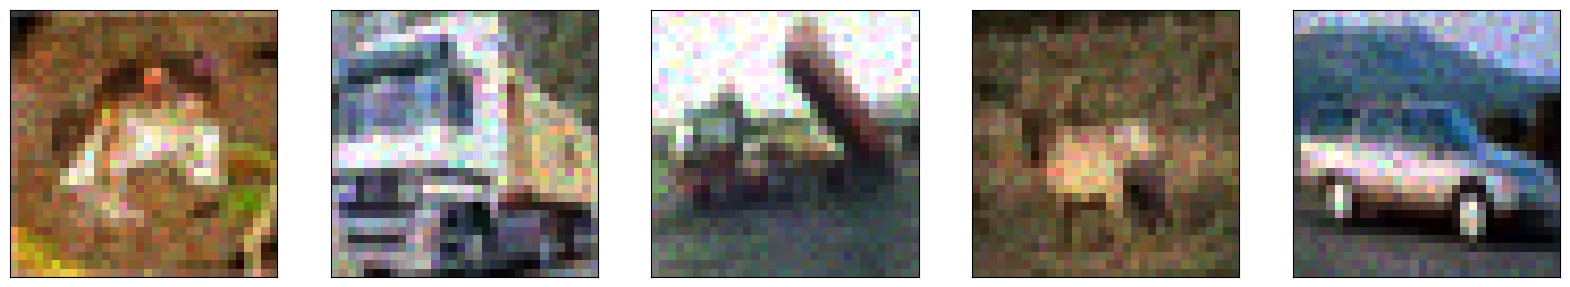

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

 Image 100 is [4]
1/1 [==============================] - 7s 7s/step
The model predict that image 100 is 6


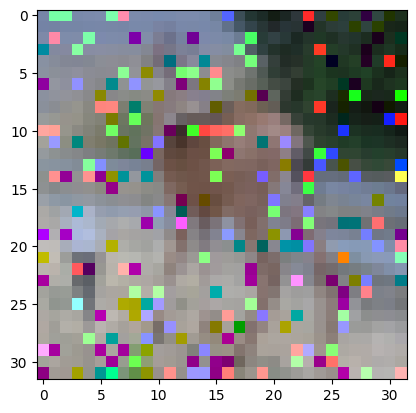

In [ ]:
my_image = x_test_noisy[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")